In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
project_path = '/content/drive/MyDrive/FinProj'
os.chdir(project_path)


In [ ]:
from ShortTermaccessor import build_sentiment_env
from actor_critic_agent import ActorCriticAgent

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'NFLX']
env = build_sentiment_env(tickers)
agent = ActorCriticAgent(env)
agent.train(episodes=20)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/content/drive/MyDrive/FinProj/Shorttermenv.py:168: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval=interval, period=period, progress=False)
/content/drive/MyDrive/FinProj/Shorttermenv.py:168: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval=interval, period=period, progress=False)
/content/drive/MyDrive/FinProj/Shorttermenv.py:168: FutureWarning: Y

Episode: 0, Total Reward: -0.0162, Final Net Worth: 98373.16
Episode: 1, Total Reward: -0.0007, Final Net Worth: 99887.99
Episode: 2, Total Reward: -0.0191, Final Net Worth: 98083.52
Episode: 3, Total Reward: -0.0041, Final Net Worth: 99571.47
Episode: 4, Total Reward: -0.0252, Final Net Worth: 97472.41
Episode: 5, Total Reward: -0.0308, Final Net Worth: 96940.24
Episode: 6, Total Reward: 0.0105, Final Net Worth: 101020.89
Episode: 7, Total Reward: -0.0101, Final Net Worth: 98958.25
Episode: 8, Total Reward: -0.0170, Final Net Worth: 98277.01
Episode: 9, Total Reward: -0.0143, Final Net Worth: 98545.27


In [ ]:
import matplotlib.pyplot as plt

def plot_episode_vs_net_worth(all_net_worths, initial_balance):
    episode_final_nw = [
        history[-1] if isinstance(history, list) and len(history) > 0 else initial_balance
        for history in all_net_worths
    ]

    plt.figure(figsize=(12, 6))
    plt.plot(episode_final_nw, marker='o', linestyle='-', color='tab:green')
    plt.axhline(y=initial_balance, color='r', linestyle='--', label='Initial Balance')
    plt.title("Final Net Worth Per Episode")
    plt.xlabel("Episode")
    plt.ylabel("Net Worth ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_net_worth_over_steps(all_net_worths):
    plt.figure(figsize=(12, 6))
    valid_histories = [h for h in all_net_worths if isinstance(h, list) and len(h) > 1]

    if not valid_histories:
        print("❌ No valid net worth histories to plot.")
        return

    for i, history in enumerate(valid_histories):
        plt.plot(history, label=f"Episode {i}")
    plt.title("Net Worth Over Time (Per Step)")
    plt.xlabel("Steps")
    plt.ylabel("Net Worth ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

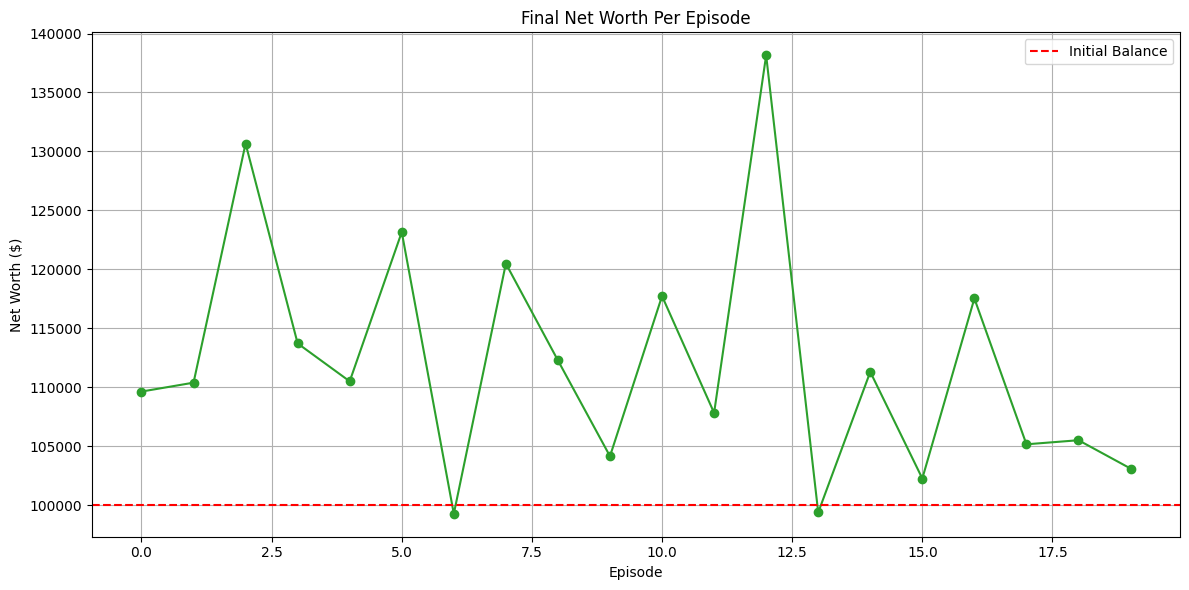

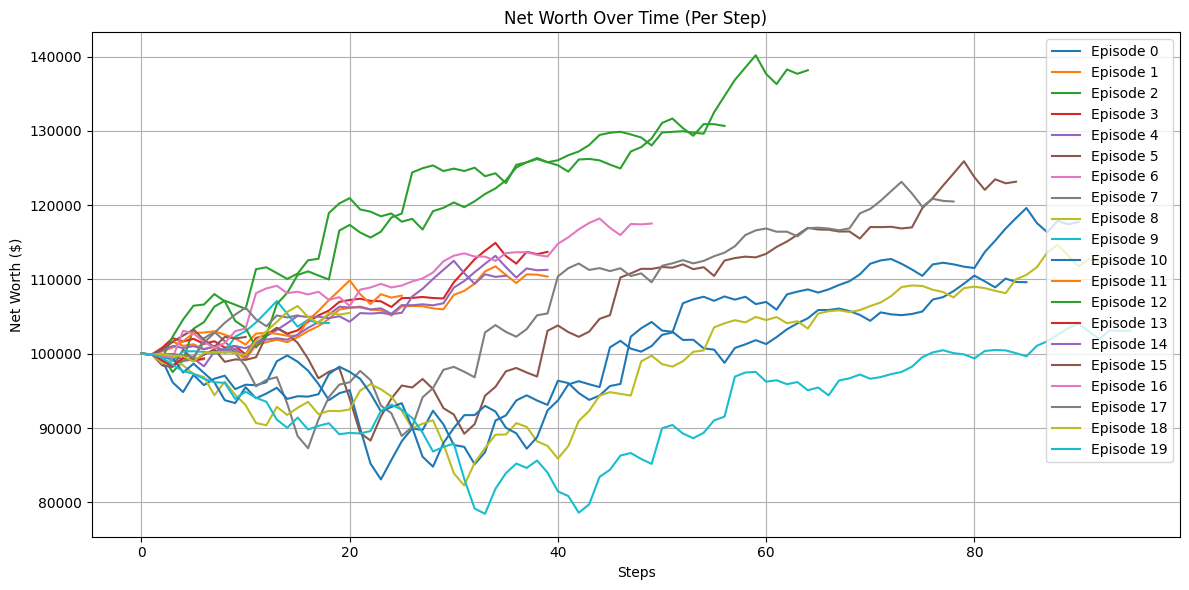

In [ ]:
# Plot final net worth per episode
plot_episode_vs_net_worth(all_net_worths, env.initial_balance)

# Plot net worth over steps for each episode
plot_net_worth_over_steps(all_net_worths)

In [ ]:
# Backtest on different tickers or time frame
def backtest(agent, tickers=['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'NFLX']):
    test_data = fetch_intraday(tickers, interval='1d', period='6mo', min_rows=100)
    if not test_data:
        print("❌ No valid test data found.")
        return

    test_env = ShortTermDynamicTrader(test_data)
    print("🔁 Running backtest...")

    # Swap environment temporarily
    original_env = agent.env
    agent.env = test_env
    all_nw, episode_nw = agent.train(episodes=1)
    agent.env = original_env  # Restore original env

    return all_nw, episode_nw

In [ ]:
# Run backtest
test_nw_histories, test_final_nw = backtest(agent, tickers=['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'META', 'NFLX'])

🔁 Running backtest...
Episode: 0, Total Reward: 0.2529, Final Net Worth: 129141.24
